<a href="https://colab.research.google.com/github/EvM82/Machine-Learning-final/blob/main/ML_final2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.model_selection import GroupKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor


## Load

In [ ]:
# Survey codes data dictionary
df1 = pd.read_csv("/content/feature_value_descriptions.csv")
df1
print(df1.to_string())

         Variable name                                           Variable label  Value                                              Value label
0         any_nonagric   Any household member working in non-agriculture sector      0                                                       No
1         any_nonagric   Any household member working in non-agriculture sector      1                                                      Yes
2          consumed100                                                   Breads      0                                                       No
3          consumed100                                                   Breads      1                                                      Yes
4         consumed1000                                            Poultry offal      0                                                       No
5         consumed1000                                            Poultry offal      1                                                  

In [ ]:
 # Computed poverty rates at given thresholds for training surveys
rates_gt_long = pd.read_csv("/content/train_rates_gt.csv") # for surveys rates
print(rates_gt_long.shape)
rates_gt_long

(3, 20)


,survey_id,pct_hh_below_3.17,pct_hh_below_3.94,pct_hh_below_4.60,pct_hh_below_5.26,pct_hh_below_5.88,pct_hh_below_6.47,pct_hh_below_7.06,pct_hh_below_7.70,pct_hh_below_8.40,pct_hh_below_9.13,pct_hh_below_9.87,pct_hh_below_10.70,pct_hh_below_11.62,pct_hh_below_12.69,pct_hh_below_14.03,pct_hh_below_15.64,pct_hh_below_17.76,pct_hh_below_20.99,pct_hh_below_27.37
0,100000,0.067364,0.118927,0.169905,0.221865,0.271564,0.319585,0.366329,0.419816,0.471454,0.523798,0.574413,0.623091,0.671263,0.721329,0.773303,0.819770,0.865121,0.909075,0.954239
1,200000,0.059326,0.111560,0.159023,0.211754,0.263100,0.311758,0.356914,0.407631,0.463443,0.512931,0.559361,0.609337,0.659291,0.708043,0.760932,0.809045,0.860350,0.906385,0.952805
2,300000,0.049803,0.100381,0.149502,0.200144,0.250192,0.300211,0.349596,0.399930,0.449845,0.499930,0.550082,0.599926,0.650088,0.699617,0.750341,0.800111,0.850081,0.899974,0.949988


In [ ]:
# Survey data dictionary
dff2 = pd.read_csv("/content/feature_descriptions.csv")
dff2
print(dff2.to_string())

         Variable name Storage type                                                            Variable label
0               sample         str8                                                                 Data Type
1                 hhid          int                                               Household unique identifier
2                  com         byte                                            Identifier of household member
3               weight          int                                                 Household sampling weight
4               strata         byte                                                   Stratification variable
5           cons_ppp17        float                     Target variable: Per-capita daily expenditure (PPP17)
6        utl_exp_ppp17        float                                          Expenditure on utilities (PPP17)
7                 male         byte                                                    Household head is male
8         

In [ ]:
x_test = pd.read_csv("/content/test_hh_features.csv")
x_test.columns.to_list()

['hhid',
 'com',
 'weight',
 'strata',
 'utl_exp_ppp17',
 'male',
 'hsize',
 'num_children5',
 'num_children10',
 'num_children18',
 'age',
 'owner',
 'water',
 'toilet',
 'sewer',
 'elect',
 'water_source',
 'sanitation_source',
 'dweltyp',
 'num_adult_female',
 'num_adult_male',
 'num_elderly',
 'employed',
 'sworkershh',
 'share_secondary',
 'educ_max',
 'sfworkershh',
 'any_nonagric',
 'sector1d',
 'region1',
 'region2',
 'region3',
 'region4',
 'region5',
 'region6',
 'region7',
 'urban',
 'consumed100',
 'consumed200',
 'consumed300',
 'consumed400',
 'consumed500',
 'consumed600',
 'consumed700',
 'consumed800',
 'consumed900',
 'consumed1000',
 'consumed1100',
 'consumed1200',
 'consumed1300',
 'consumed1400',
 'consumed1500',
 'consumed1600',
 'consumed1700',
 'consumed1800',
 'consumed1900',
 'consumed2000',
 'consumed2100',
 'consumed2200',
 'consumed2300',
 'consumed2400',
 'consumed2500',
 'consumed2600',
 'consumed2700',
 'consumed2800',
 'consumed2900',
 'consumed3000',


In [ ]:
df_train = pd.read_csv("/content/train_hh_features.csv")
print(df_train.shape)
df_train.columns.to_list()

(77501, 88)


['hhid',
 'com',
 'weight',
 'strata',
 'utl_exp_ppp17',
 'male',
 'hsize',
 'num_children5',
 'num_children10',
 'num_children18',
 'age',
 'owner',
 'water',
 'toilet',
 'sewer',
 'elect',
 'water_source',
 'sanitation_source',
 'dweltyp',
 'num_adult_female',
 'num_adult_male',
 'num_elderly',
 'employed',
 'sworkershh',
 'share_secondary',
 'educ_max',
 'sfworkershh',
 'any_nonagric',
 'sector1d',
 'region1',
 'region2',
 'region3',
 'region4',
 'region5',
 'region6',
 'region7',
 'urban',
 'consumed100',
 'consumed200',
 'consumed300',
 'consumed400',
 'consumed500',
 'consumed600',
 'consumed700',
 'consumed800',
 'consumed900',
 'consumed1000',
 'consumed1100',
 'consumed1200',
 'consumed1300',
 'consumed1400',
 'consumed1500',
 'consumed1600',
 'consumed1700',
 'consumed1800',
 'consumed1900',
 'consumed2000',
 'consumed2100',
 'consumed2200',
 'consumed2300',
 'consumed2400',
 'consumed2500',
 'consumed2600',
 'consumed2700',
 'consumed2800',
 'consumed2900',
 'consumed3000',


In [ ]:
dftr2 = pd.read_csv("/content/train_hh_gt.csv")
dftr2

,survey_id,hhid,cons_ppp17
0,100000,100001,25.258402
1,100000,100002,16.996706
2,100000,100003,13.671848
3,100000,100004,7.189475
4,100000,100005,12.308855
...,...,...,...
104229,300000,337458,2.830888
104230,300000,337459,3.144309
104231,300000,337460,3.319158
104232,300000,337461,6.088739


## Preprocessing

In [ ]:
keys = ['survey_id', 'hhid']
train = df_train.merge(dftr2, on=keys, how='inner', suffixes=('', '_dup'))


In [ ]:
num_cols = train.select_dtypes(include=['int64','float64']).columns
cat_cols = train.select_dtypes(include=['object']).columns

train[num_cols] = train[num_cols].fillna(train[num_cols].median())
train[cat_cols] = train[cat_cols].fillna(train[cat_cols].mode().iloc[0])



In [ ]:
num_cols = x_test.select_dtypes(include=['int64','float64']).columns
cat_cols = x_test.select_dtypes(include=['object']).columns

x_test[num_cols] = x_test[num_cols].fillna(x_test[num_cols].median())
x_test[cat_cols] = x_test[cat_cols].fillna(x_test[cat_cols].mode().iloc[0])



In [ ]:
train_encoded = pd.get_dummies(train, columns=cat_cols, drop_first=False)
x_test_encoded = pd.get_dummies(x_test, columns=cat_cols, drop_first=False)

train_encoded, x_test_encoded = train_encoded.align(x_test_encoded, join='left', axis=1, fill_value=0)


In [ ]:
scaler = StandardScaler()

num_cols = train_encoded.select_dtypes(include=['float64','int64']).columns.drop('cons_ppp17')

train_encoded[num_cols] = scaler.fit_transform(train_encoded[num_cols])
x_test_encoded[num_cols] = scaler.transform(x_test_encoded[num_cols])


## συσχετιση χαρακτηριστικών

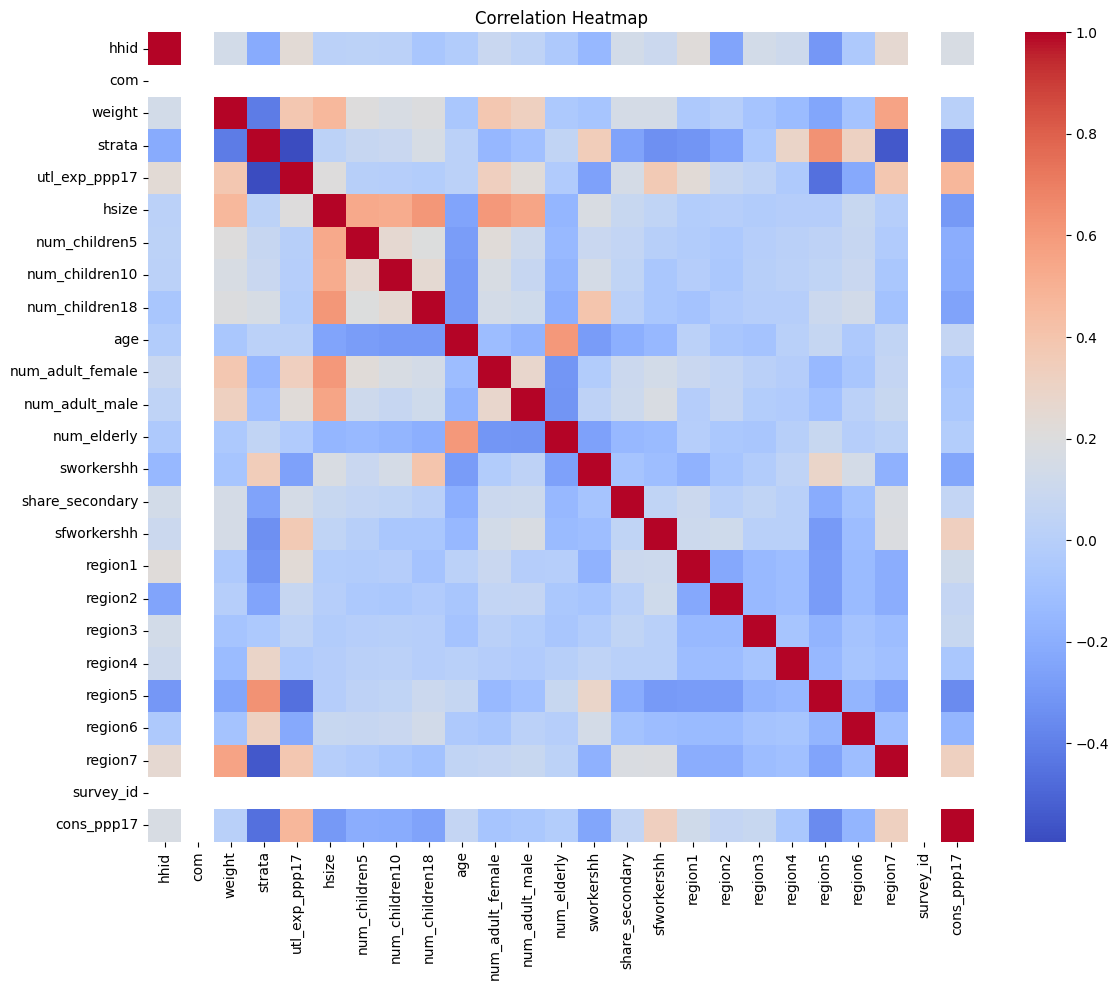

In [ ]:
corr = train.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


## split

In [ ]:
# TRAIN
y = train_encoded['cons_ppp17']
x = train_encoded.drop(columns=['cons_ppp17','weight', 'survey_id', 'strata', 'hhid', 'com'])

# TEST
x_test = x_test_encoded.drop(columns=['weight','survey_id','strata','hhid','com'], errors='ignore')

# Ευθυγράμμιση στηλών
x_test = x_test.reindex(columns=x.columns, fill_value=0)


In [ ]:
print(x.shape)
print(y.shape)
print(x_test.shape)


(77500, 179)
(77500,)
(75076, 179)


In [ ]:
threshold_cols = [c for c in train.columns if c.startswith("pct_hh_below_")]
thresholds = [float(c.replace("pct_hh_below_", "")) for c in threshold_cols]


In [ ]:
x_test.columns.to_list()

['utl_exp_ppp17',
 'hsize',
 'num_children5',
 'num_children10',
 'num_children18',
 'age',
 'num_adult_female',
 'num_adult_male',
 'num_elderly',
 'sworkershh',
 'share_secondary',
 'sfworkershh',
 'region1',
 'region2',
 'region3',
 'region4',
 'region5',
 'region6',
 'region7',
 'male_Female',
 'male_Male',
 'owner_Not owner',
 'owner_Owner',
 'water_Access',
 'water_No access',
 'toilet_Access',
 'toilet_No access',
 'sewer_Access',
 'sewer_No access',
 'elect_Access',
 'elect_No access',
 'water_source_Other',
 'water_source_Piped water into dwelling',
 'water_source_Piped water to yard/plot',
 'water_source_Protected dug well',
 'water_source_Protected spring',
 'water_source_Public tap or standpipe',
 'water_source_Surface water',
 'water_source_Tanker-truck',
 'sanitation_source_A piped sewer system',
 'sanitation_source_A septic tank',
 'sanitation_source_No facilities or bush or field',
 'sanitation_source_Other',
 'sanitation_source_Pit latrine',
 'sanitation_source_Pit lat

## Linear Regression

In [ ]:
gt_cols = [c for c in train.columns if c.startswith("pct_hh_below_")]

rates_gt_long = train[["survey_id"] + gt_cols].drop_duplicates("survey_id").melt(
    id_vars=["survey_id"],
    value_vars=gt_cols,
    var_name="thr_col",
    value_name="pov_rate_gt"
)

rates_gt_long["threshold"] = (
    rates_gt_long["thr_col"].str.replace("pct_hh_below_", "", regex=False).astype(float)
)

rates_gt_long = rates_gt_long[["survey_id", "threshold", "pov_rate_gt"]]

print(rates_gt_long.shape)   # αναμένεις (57, 3) αν έχεις 3 surveys και 19 thresholds
rates_gt_long.head()


(0, 3)


,survey_id,threshold,pov_rate_gt


In [38]:
# Μετατροπή των ποσοτών (poverty rates) που δίνονται και πρεπει να υπολογίσω σε πίνακα συ,βατης μορφής με δεδομενα για
# να χρησιμοποιηθεί σε σύγκριση με τα οσοστά που θα βρεθούν/υυπολογιστούν
gt_cols = [c for c in train.columns if c.startswith("pct_hh_below_")]
rates_gt_long = train.melt(
    id_vars=["survey_id"],
    value_vars=gt_cols,
    var_name="thr_col",
    value_name="pov_rate_gt"
)
rates_gt_long["threshold"] = rates_gt_long["thr_col"].str.replace("pct_hh_below_", "", regex=False).astype(float)
rates_gt_long = rates_gt_long[["survey_id", "threshold", "pov_rate_gt"]]

# για να γινει split ανά survey
groups = train["survey_id"]
gkf = GroupKFold(n_splits=3) #3 γατι εχω 3 surveys συνολικά

hh_mae_list, hh_rmse_list = [], []
rates_mae_list, rates_mape_list = [], []

# x/y_train , x/y_val για κάθε fold (survey)
for fold, (train_idx, val_idx) in enumerate(gkf.split(x, y, groups=groups), start=1):
    X_train, X_val = x.iloc[train_idx], x.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]


    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    # 3) MAE metrics
    mae = mean_absolute_error(y_val, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    hh_mae_list.append(mae)

    # 4) Predicted poverty rates from household predictions (NO custom function)
    df_val = train.iloc[val_idx][["survey_id", "weight"]].copy()
    df_val["cons_pred"] = y_pred

    pred_rates = []
    for sid, g in df_val.groupby("survey_id"):
        wsum = g["weight"].sum()
        for t in thresholds:
            rate = (g["weight"] * (g["cons_pred"] < t)).sum() / wsum   # STRICTLY below
            pred_rates.append((sid, float(t), float(rate)))
    pred_rates = pd.DataFrame(pred_rates, columns=["survey_id", "threshold", "pov_rate_pred"])

    # 5) Compare predicted vs true poverty rates (MAE + MAPE)
    pred_rates["threshold"] = pred_rates["threshold"].astype(float)
    rates_gt_long["threshold"] = rates_gt_long["threshold"].astype(float)

    m = pred_rates.merge(rates_gt_long, on=["survey_id", "threshold"], how="inner")
    rates_mae = np.mean(np.abs(m["pov_rate_pred"] - m["pov_rate_gt"]))
    rates_mape = np.mean(
        np.abs(m["pov_rate_pred"] - m["pov_rate_gt"]) / np.maximum(np.abs(m["pov_rate_gt"]), 1e-9)
    )
    rates_mae_list.append(rates_mae)
    rates_mape_list.append(rates_mape)

    # 6) Print fold results
    val_surveys = train.iloc[val_idx]["survey_id"].unique()
    print(f"\nFold {fold} | Val survey(s): {val_surveys}")
    print(f"Household (consumption): MAE={mae:.6f}  RMSE={rmse:.6f}")
    print(f"Poverty rates:          MAE={rates_mae:.6f}  MAPE={rates_mape:.6f}")

# Summary (mean only)
print("\n===== CV Summary (mean) =====")
print(f"Household MAE : {np.mean(hh_mae_list):.6f}")
print(f"Rates MAE     : {np.mean(rates_mae_list):.6f}")
print(f"Rates MAPE    : {np.mean(rates_mape_list):.6f}")

Fold 1 | Val survey(s): [300000]
Household (consumption): MAE=4.141209  RMSE=6.973544
Poverty rates:          MAE=0.064701  MAPE=0.190227

Fold 2 | Val survey(s): [200000]
Household (consumption): MAE=4.153473  RMSE=6.857333
Poverty rates:          MAE=0.068499  MAPE=0.187864

Fold 3 | Val survey(s): [100000]
Household (consumption): MAE=4.141485  RMSE=6.839733
Poverty rates:          MAE=0.068468  MAPE=0.193205

===== CV Summary (mean) =====
Household MAE : 4.145389
Household RMSE: nan
Rates MAE     : 0.067223
Rates MAPE    : 4.145389


## Random Forest

In [ ]:
param_grid = [
    {'n_estimators': 100, 'max_depth': None, 'min_samples_leaf': 2},
    {'n_estimators': 200, 'max_depth': 10,   'min_samples_leaf': 5},
    {'n_estimators': 200, 'max_depth': 20,   'min_samples_leaf': 5},
    {'n_estimators': 200, 'max_depth': 20,   'min_samples_leaf': 5}
]


In [ ]:
rates_gt_long["threshold"] = rates_gt_long["threshold"].astype(float)
thresholds = [float(t) for t in thresholds]

for params in param_grid:
    print("Testing params:", params)

    hh_mae_list, hh_rmse_list = [], []
    rates_mae_list, rates_mape_list = [], []

    for fold, (train_idx, val_idx) in enumerate(gkf.split(x, y, groups=groups), start=1):

        X_train, X_val = x.iloc[train_idx], x.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model = RandomForestRegressor(
            **params,
            random_state=42,
            n_jobs=-1
        )

        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

        # metrics
        hh_mae_list.append(mean_absolute_error(y_val, y_pred))

        df_val = train.iloc[val_idx][["survey_id", "weight"]].copy()
        df_val["cons_pred"] = y_pred

        pred_rates = []
        for sid, g in df_val.groupby("survey_id"):
            wsum = g["weight"].sum()
            for t in thresholds:
                t = float(t)
                r = (g["weight"] * (g["cons_pred"] < t)).sum() / wsum
                pred_rates.append((sid, t, r))

        pred_rates = pd.DataFrame(
            pred_rates, columns=["survey_id", "threshold", "pov_rate_pred"]
        )
        pred_rates["threshold"] = pred_rates["threshold"].astype(float)

        # merge predicted vs true
        m = pred_rates.merge(
            rates_gt_long, on=["survey_id", "threshold"], how="inner"
        )

        rates_mae_list.append(
            np.mean(np.abs(m["pov_rate_pred"] - m["pov_rate_gt"]))
        )

    print(f"MEAN Rates MAE : {np.mean(rates_mae_list):.6f}")
    print(f"MEAN HH MAE    : {np.mean(hh_mae_list):.6f}")


Testing Random Forest params: {'n_estimators': 100, 'max_depth': None, 'min_samples_leaf': 2}
Mean Rates MAE: 0.052381
Mean HH MAE:    3.6214

Testing Random Forest params: {'n_estimators': 200, 'max_depth': 10, 'min_samples_leaf': 5}
Mean Rates MAE: 0.049892
Mean HH MAE:    3.5179

Testing Random Forest params: {'n_estimators': 200, 'max_depth': 20, 'min_samples_leaf': 5}
Mean Rates MAE: 0.047466
Mean HH MAE:    3.459733

BEST Random Forest params: {'n_estimators': 200, 'max_depth': 20, 'min_samples_leaf': 5}
BEST Rates MAE: 0.047466
BEST HH MAE   : 3.459733


## MLP

In [ ]:
rates_gt_long["threshold"] = rates_gt_long["threshold"].astype(float)
thresholds = sorted(rates_gt_long["threshold"].unique().astype(float))

hidden_configs = [(64,),(128,),(128, 64),(256, 128)]

best_rates_mae = np.inf
best_config = None

for h in hidden_configs:
    print(f"\nTesting hidden_layer_sizes={h}")

    hh_mae_folds = []
    rates_mae_folds = []

    for fold_i, (train_idx, val_idx) in enumerate(gkf.split(x, y, groups=groups), start=1):

        X_train, X_val = x.iloc[train_idx], x.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        scaler = StandardScaler()
        X_train_s = scaler.fit_transform(X_train)
        X_val_s = scaler.transform(X_val)

        model = MLPRegressor(
            hidden_layer_sizes=h,
            activation="relu",
            solver="adam",
            alpha=1e-4,
            learning_rate_init=1e-3,
            max_iter=200,
            early_stopping=True,
            n_iter_no_change=10,
            random_state=42
        )

        model.fit(X_train_s, y_train)
        y_pred = model.predict(X_val_s)

        # household MAE
        hh_mae_folds.append(mean_absolute_error(y_val, y_pred))

        df_val = train.iloc[val_idx][["survey_id", "weight"]].copy()
        df_val["cons_pred"] = y_pred

        pred_rates = []
        for sid, g in df_val.groupby("survey_id"):
            wsum = g["weight"].sum()
            for t in thresholds:
                r = (g["weight"] * (g["cons_pred"] < t)).sum() / wsum
                pred_rates.append((sid, float(t), float(r)))

        pred_rates = pd.DataFrame(
            pred_rates, columns=["survey_id", "threshold", "pov_rate_pred"]
        )
        pred_rates["threshold"] = pred_rates["threshold"].astype(float)

        m = pred_rates.merge(
            rates_gt_long, on=["survey_id", "threshold"], how="inner"
        )


        rates_mae_folds.append(rates_mae)

    finite_rates = [v for v in rates_mae_folds if np.isfinite(v)]
    mean_rates_mae = float(np.mean(finite_rates)) if len(finite_rates) > 0 else np.inf
    mean_hh_mae = float(np.mean(hh_mae_folds)) if len(hh_mae_folds) > 0 else np.inf

    print(f"Mean Rates MAE: {mean_rates_mae:.4f}")
    print(f"Mean HH MAE:    {mean_hh_mae:.4f}")

    if mean_rates_mae < best_rates_mae:
        best_rates_mae = mean_rates_mae
        best_config = h

print("\nBEST hidden_layer_sizes:", best_config)
print("BEST Rates MAE:", best_rates_mae)


Testing hidden_layer_sizes=(64,)
Mean Rates MAE: nan
Mean HH MAE:    3.5199

Testing hidden_layer_sizes=(128,)
Mean Rates MAE: nan
Mean HH MAE:    3.5499

Testing hidden_layer_sizes=(128, 64)
Mean Rates MAE: nan
Mean HH MAE:    3.3794

Testing hidden_layer_sizes=(256, 128)
Mean Rates MAE: nan
Mean HH MAE:    3.3807

BEST hidden_layer_sizes: (256, 128)
BEST Rates MAE: 0.026233
BEST HH MAE   : 3.333400


## XGBoost

In [ ]:
gt_cols = [c for c in train.columns if c.startswith("pct_hh_below_")]
rates_gt_long = train.melt(
    id_vars=["survey_id"],
    value_vars=gt_cols,
    var_name="thr_col",
    value_name="pov_rate_gt"
)
rates_gt_long["threshold"] = (
    rates_gt_long["thr_col"].str.replace("pct_hh_below_", "", regex=False).astype(float)
)
rates_gt_long = rates_gt_long[["survey_id", "threshold", "pov_rate_gt"]]

thresholds = sorted([float(t) for t in thresholds])

groups = train["survey_id"]
gkf = GroupKFold(n_splits=3)

param_list = [
    dict(n_estimators=600, max_depth=4, learning_rate=0.05, subsample=0.8, colsample_bytree=0.8),
    dict(n_estimators=800, max_depth=5, learning_rate=0.05, subsample=0.8, colsample_bytree=0.8),
    dict(n_estimators=1200, max_depth=5, learning_rate=0.03, subsample=0.7, colsample_bytree=0.8),
]

best = {"rates_mae": np.inf, "params": None}

for params in param_list:
    hh_mae_folds, hh_rmse_folds = [], []
    rates_mae_folds, rates_mape_folds = [], []

    for train_idx, val_idx in gkf.split(x, y, groups=groups):
        X_train, X_val = x.iloc[train_idx], x.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model = XGBRegressor(
            objective="reg:squarederror",
            reg_lambda=1.0,
            random_state=42,
            n_jobs=-1,
            **params
        )
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

        # household metrics
        hh_mae_folds.append(mean_absolute_error(y_val, y_pred))
        hh_rmse_folds.append(np.sqrt(mean_squared_error(y_val, y_pred)))

        df_val = train.iloc[val_idx][["survey_id", "weight"]].copy()
        df_val["cons_pred"] = y_pred

        pred_rates = []
        for sid, g in df_val.groupby("survey_id"):
            wsum = g["weight"].sum()
            for t in thresholds:
                rate = (g["weight"] * (g["cons_pred"] < t)).sum() / wsum
                pred_rates.append((sid, float(t), float(rate)))

        pred_rates = pd.DataFrame(
            pred_rates, columns=["survey_id", "threshold", "pov_rate_pred"]
        )

        pred_rates["threshold"] = pred_rates["threshold"].astype(float)
        rates_gt_long["threshold"] = rates_gt_long["threshold"].astype(float)

        m = pred_rates.merge(rates_gt_long, on=["survey_id", "threshold"], how="inner")
        rates_mae = np.mean(np.abs(m["pov_rate_pred"] - m["pov_rate_gt"]))
        rates_mape = np.mean(
            np.abs(m["pov_rate_pred"] - m["pov_rate_gt"]) / np.maximum(np.abs(m["pov_rate_gt"]), 1e-9)
        )

        rates_mae_folds.append(rates_mae)
        rates_mape_folds.append(rates_mape)

    mean_rates_mae = float(np.mean(rates_mae_folds))
    print("Params:", params, "| MEAN Rates MAE:", round(mean_rates_mae, 6))

    if mean_rates_mae < best["rates_mae"]:
        best = {
            "rates_mae": mean_rates_mae,
            "params": params,
            "hh_mae": float(np.mean(hh_mae_folds)),
            "hh_rmse": float(np.mean(hh_rmse_folds)),
            "rates_mape": float(np.mean(rates_mape_folds)),
        }

print("\nBEST PARAMS:", best["params"])
print("BEST mean Rates MAE :", best["rates_mae"])
print("BEST mean HH MAE    :", best["hh_mae"])
print("BEST mean HH RMSE   :", best["hh_rmse"])


Params: {'n_estimators': 600, 'max_depth': 4, 'learning_rate': 0.05, 'subsample': 0.8, 'colsample_bytree': 0.8} | MEAN Rates MAE: 0.034842
Params: {'n_estimators': 800, 'max_depth': 5, 'learning_rate': 0.05, 'subsample': 0.8, 'colsample_bytree': 0.8} | MEAN Rates MAE: 0.033206
Params: {'n_estimators': 1200, 'max_depth': 5, 'learning_rate': 0.03, 'subsample': 0.7, 'colsample_bytree': 0.8} | MEAN Rates MAE: 0.033398

BEST PARAMS: {'n_estimators': 800, 'max_depth': 4, 'learning_rate': 0.07, 'subsample': 0.9, 'colsample_bytree': 0.9}
BEST mean Rates MAE : 0.03247406534917616
BEST mean Rates MAPE: 0.11510751129309464
BEST mean HH MAE    : 3.3104156843680363
BEST mean HH RMSE   : 5.891726178591934


## Αποτελέσματα

Παρακάτω τυπώνονται και δημιουργείται plot για τα αποτελέσματα του κάθε μοντέλου (ΜΑΕ στο household και ΜΑΕ στα poverty rates) για τ αμοντέλα με τις καλύτερες παραμέτρους.

In [ ]:
results = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Random Forest",
        "XGBoost",
        "MLP (256,128)"
    ],
    "Rates MAE": [
        0.067223,
        0.047466,
        0.032474,
        0.026233
    ],
    "Household MAE": [
        4.145389,
        3.459733,
        3.310416,
        3.333400
    ]
})

results


,Model,Rates MAE,Household MAE
0,Linear Regression,0.067223,4.145389
1,Random Forest,0.047466,3.459733
2,XGBoost,0.032474,3.310416
3,"MLP (256,128)",0.026233,3.333400


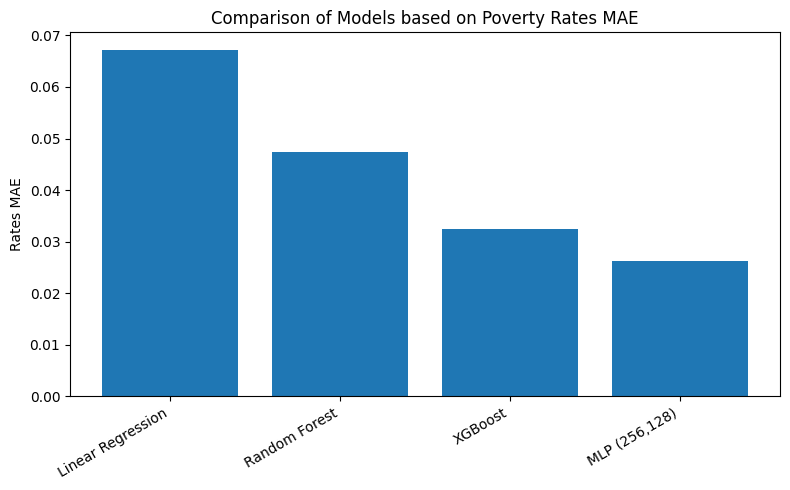

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(results["Model"], results["Rates MAE"])
plt.ylabel("Rates MAE")
plt.title("Comparison of Models based on Poverty Rates MAE")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


Το MLP έχει το χαμηλότερο, άρα αυτό θεωρείται το καλύτερο.

## Εκπαίδευση του πιο αποδοτικού με τις βέλτιστες παρτάμετρους σε όλο το train set και μετά εφαρμογή στο σύνολο επικύρωσης.

In [ ]:
best_hidden = (256, 128)

mlp_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPRegressor(
        hidden_layer_sizes=best_hidden,
        activation="relu",
        solver="adam",
        alpha=1e-4,
        learning_rate_init=1e-3,
        max_iter=200,
        early_stopping=True,
        n_iter_no_change=10,
        random_state=42
    ))
])

mlp_pipe.fit(x, y)

# Save model
joblib.dump(mlp_pipe, "mlp_best_pipeline.joblib")
print("Saved: mlp_best_pipeline.joblib")


Saved: mlp_best_pipeline.joblib


## Test

In [ ]:

import joblib
pipe = joblib.load("mlp_best_pipeline.joblib")
y_test_pred = pipe.predict(x_test)
